In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D



# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-premier-league-match-analysis/matches.csv


In [2]:
df = pd.read_csv('/kaggle/input/indian-premier-league-match-analysis/matches.csv')

#This part reads the CSV file named "matches.csv" located in the specified directory on Kaggle. CSV stands for Comma-Separated Values, a common format for storing tabular data.

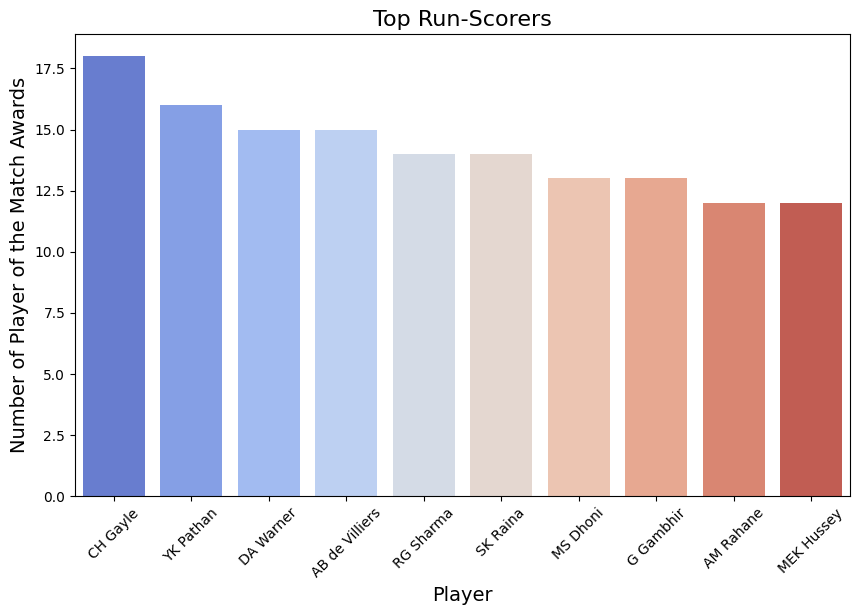

In [3]:
#using the barplot to represent the top run scorers 
top_scorers = df.groupby('player_of_match')['player_of_match'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='coolwarm')
plt.title('Top Run-Scorers', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Player of the Match Awards', fontsize=14)
plt.show()
#top run scorers 

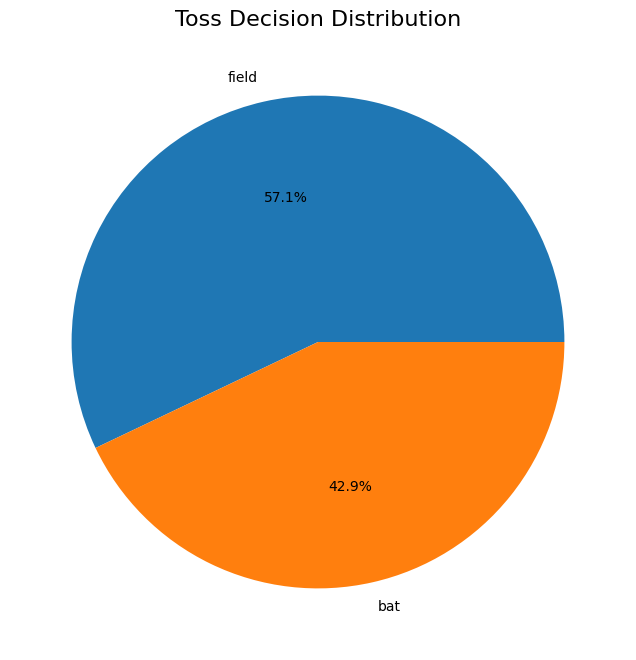

In [4]:
#Toss Decision Distribution using pie chart, taking the field in blue block and bat in orange block
plt.figure(figsize=(8, 8))
plt.pie(df['toss_decision'].value_counts(), labels=df['toss_decision'].value_counts().index, autopct='%1.1f%%')
plt.title('Toss Decision Distribution', fontsize=16)
plt.show()

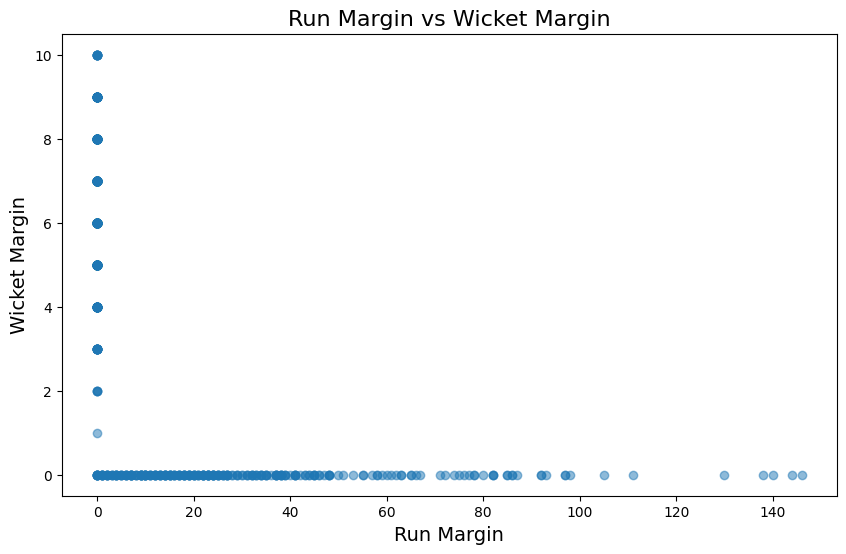

In [5]:
#using scatter plot of run margin vs wirket margin
plt.figure(figsize=(10, 6))
plt.scatter(df['win_by_runs'], df['win_by_wickets'], alpha=0.5)
plt.title('Run Margin vs Wicket Margin', fontsize=16)
plt.xlabel('Run Margin', fontsize=14)
plt.ylabel('Wicket Margin', fontsize=14)
plt.show()

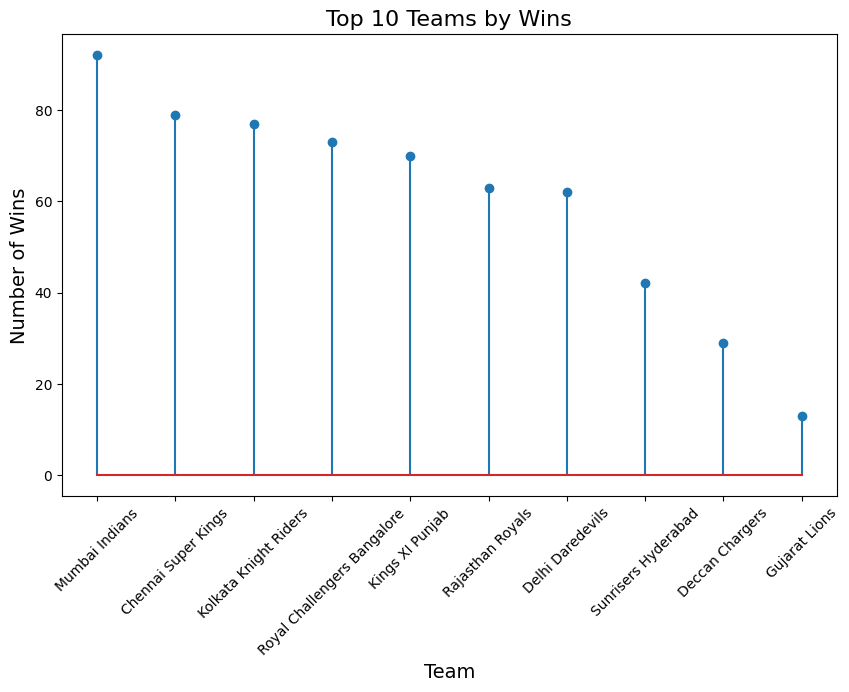

In [6]:
#using the stem plot to represent the top 10 teams by wins
top_teams = df['winner'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.stem(top_teams.index, top_teams.values)
plt.title('Top 10 Teams by Wins', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.xticks(rotation=45)
plt.show()

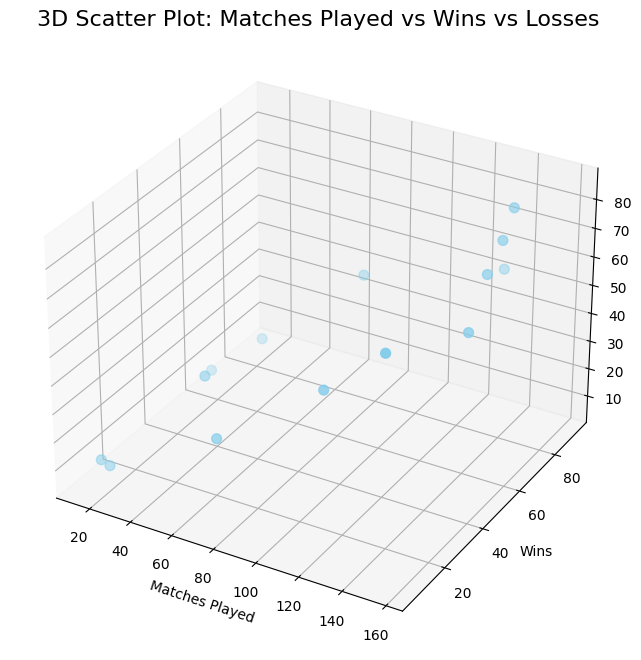

In [7]:
#using the 3D plot to represent total Matches played vs Wins vs Loses 
team_matches = df.groupby('team1')['team1'].count() + df.groupby('team2')['team2'].count()
team_wins = df['winner'].value_counts()
team_losses = team_matches - team_wins

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(team_matches, team_wins, team_losses, c='skyblue', s=50)
ax.set_xlabel('Matches Played')
ax.set_ylabel('Wins')
ax.set_zlabel('Losses')
plt.title('3D Scatter Plot: Matches Played vs Wins vs Losses', fontsize=16)
plt.show()

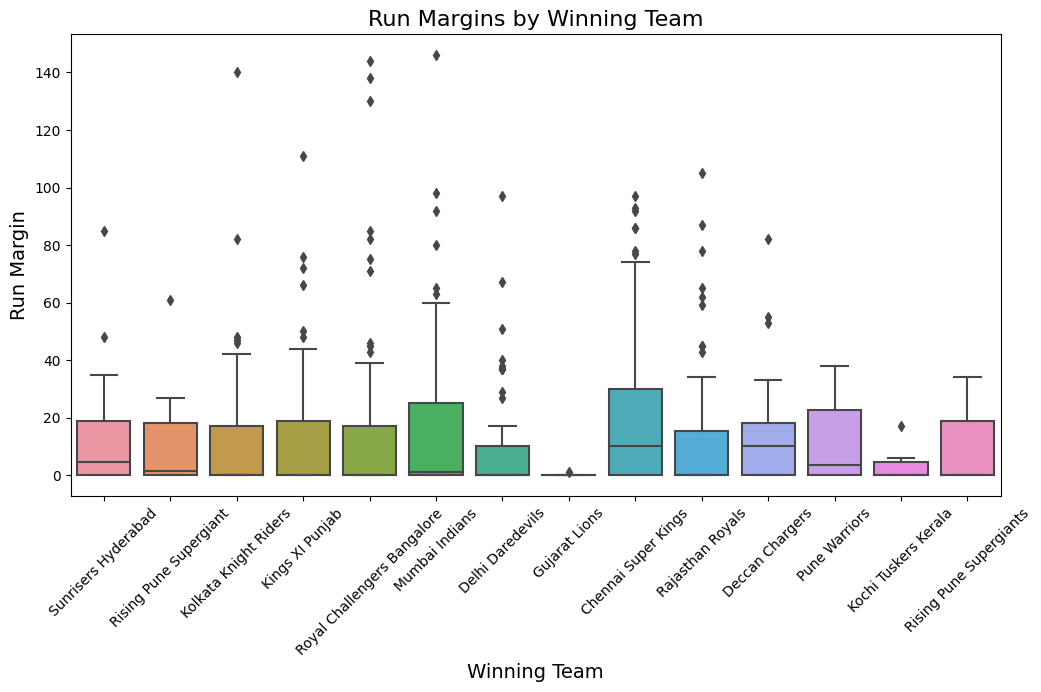

In [8]:
#using the boxplot to represent run margins by winning teams 
plt.figure(figsize=(12, 6))
sns.boxplot(x='winner', y='win_by_runs', data=df)
plt.title('Run Margins by Winning Team', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Winning Team', fontsize=14)
plt.ylabel('Run Margin', fontsize=14)
plt.show()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64


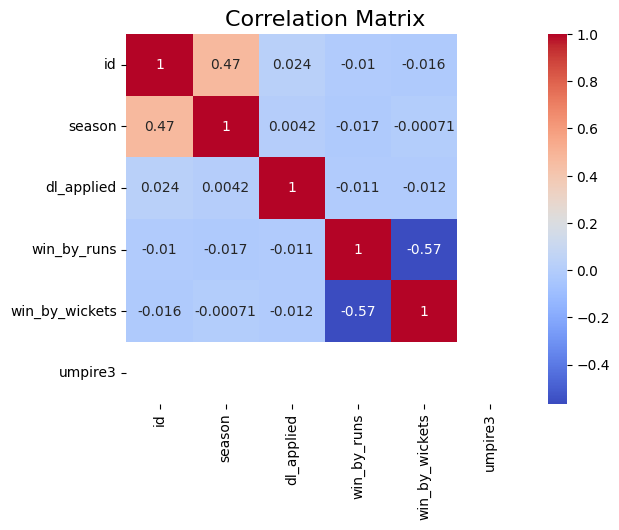

In [9]:
print(df.isnull().sum())
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

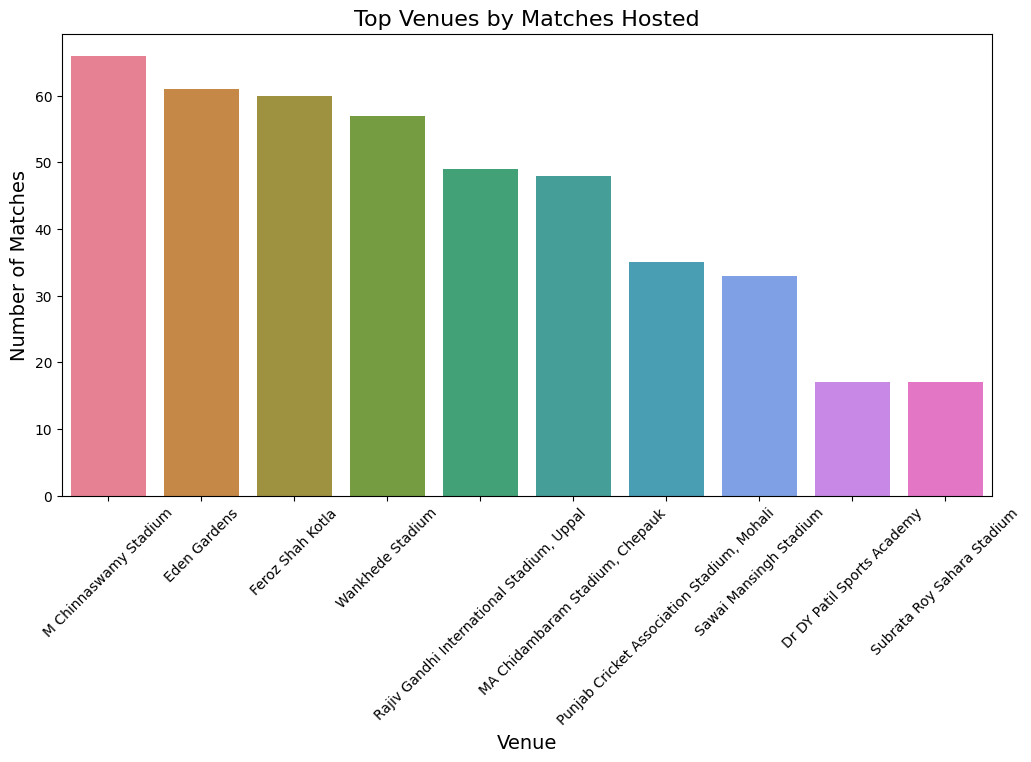

In [10]:
#using the countplot to represent the top venues hosted the maximum number of matches 
plt.figure(figsize=(12, 6))
sns.countplot(x='venue', data=df, order=df['venue'].value_counts().index[:10], palette='husl')
plt.title('Top Venues by Matches Hosted', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Venue', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.show()